# Inspiration
Socio-economic classification models in the Philippines has been very problematic. In fact, not one SEC model has been widely accepted. Government bodies uses their own SEC models and private research entities uses their own. We all know that household income is the greatest indicator of one's socio-economic classification that's why the publisher would like to find out the following:

1. Best model in predicting household income
2. Key drivers of household income, we want to make the model as sparse as possible
3. Some exploratory analysis in the data would also be useful

From <https://www.kaggle.com/grosvenpaul/family-income-and-expenditure>

---

## Libraries

In [62]:
# Import libraries to be used
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

## Data import

In [2]:
# Importing csv data into pandas dataframes
data = pd.read_csv('./family-income-expenditure.csv')

In [3]:
data.head(5)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [4]:
# data.info()
data['Total Household Income'].describe()

count    4.154400e+04
mean     2.475556e+05
std      2.868805e+05
min      1.128500e+04
25%      1.048950e+05
50%      1.640795e+05
75%      2.911385e+05
max      1.181599e+07
Name: Total Household Income, dtype: float64

## Exploratory data analysis

In [5]:
# Reviewing columns and datatypes of dataset
# data.info()
data.shape

(41544, 60)

### Missing data analysis

In [6]:
# Columns with missing data
data.columns[np.sum(data.isnull()) != 0]

Index(['Household Head Occupation', 'Household Head Class of Worker'], dtype='object')

In [7]:
np.sum(data['Household Head Occupation'].isnull())

7536

In [8]:
np.sum(data['Household Head Class of Worker'].isnull())

7536

### Region data analysis

Checking number of regions in data

In [9]:
# of regions
no_regions = data['Region'].value_counts()
no_regions

IVA - CALABARZON             4162
NCR                          4130
III - Central Luzon          3237
VI - Western Visayas         2851
VII - Central Visayas        2541
V - Bicol Region             2472
XI - Davao Region            2446
I - Ilocos Region            2348
VIII - Eastern Visayas       2337
 ARMM                        2248
II - Cagayan Valley          2219
XII - SOCCSKSARGEN           2122
X - Northern Mindanao        1887
IX - Zasmboanga Peninsula    1788
Caraga                       1782
CAR                          1725
IVB - MIMAROPA               1249
Name: Region, dtype: int64

In [10]:
no_regions.count()

17

Checking avg hh income by region

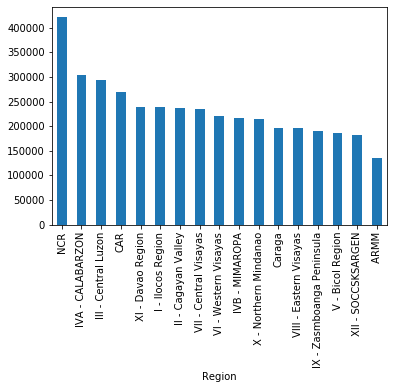

In [11]:
region_avg_income = data.groupby(data['Region'])['Total Household Income'].mean().sort_values(axis=0, ascending=False)
# region_avg_income.sort_values(axis=0, ascending=False)
region_avg_income.plot(kind="bar")

Checking avg food expenditure by region

In [12]:
region_avg_food_exp = data.groupby(data['Region'])['Total Food Expenditure'].mean()
region_avg_food_exp.sort_values(axis=0, ascending=False)

Region
NCR                          127080.456659
IVA - CALABARZON             105333.949543
III - Central Luzon           99726.701576
VII - Central Visayas         84307.184179
XI - Davao Region             81126.927228
I - Ilocos Region             80649.937819
CAR                           80352.780290
VI - Western Visayas          79829.025956
V - Bicol Region              76811.412217
II - Cagayan Valley           75604.358269
Caraga                        71912.659933
XII - SOCCSKSARGEN            71738.088596
IVB - MIMAROPA                70760.293835
VIII - Eastern Visayas        69833.928969
IX - Zasmboanga Peninsula     69645.318233
 ARMM                         64931.270463
X - Northern Mindanao         64112.585586
Name: Total Food Expenditure, dtype: float64

Checking avg 'other' expenditure by region

In [13]:
region_avg_other_exp = data.groupby(data['Region'])['Alcoholic Beverages Expenditure'].mean()
region_avg_other_exp.sort_values(axis=0, ascending=False)

Region
II - Cagayan Valley          1746.317711
VI - Western Visayas         1627.401613
NCR                          1433.314286
IVB - MIMAROPA               1385.285829
I - Ilocos Region            1374.896082
VII - Central Visayas        1141.342385
VIII - Eastern Visayas       1096.986735
XII - SOCCSKSARGEN           1070.154100
III - Central Luzon          1057.337658
IVA - CALABARZON             1035.411100
CAR                          1028.183768
XI - Davao Region             985.568684
V - Bicol Region              812.561084
Caraga                        724.442200
IX - Zasmboanga Peninsula     713.077740
X - Northern Mindanao         680.943296
 ARMM                          77.711744
Name: Alcoholic Beverages Expenditure, dtype: float64

Individual data analysis

In [14]:
# Region data
indv_region_data = data[data['Region'] == 'NCR']
# indv_region_data.head()
indv_region_data.describe()
# indv_region_data.describe().shape
# indv_region_data['Total Household Income'].max()
# indv_region_data['Total Household Income'].min()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.130000e+03,4130.000000,4130.000000,4130.000000,4130.000000,4130.000000,4130.000000,4130.000000,4130.000000,4130.000000,...,4130.000000,4130.000000,4130.00000,4130.000000,4130.000000,4130.000000,4130.000000,4130.000000,4130.000000,4130.000000
mean,4.208619e+05,127080.456659,1.727361,24728.881840,16195.817918,17362.191768,11129.341646,3577.542131,5633.564891,40036.045036,...,0.602906,0.661985,0.28862,0.151574,0.193947,2.537288,0.566828,0.196610,0.001695,0.172155
std,3.844857e+05,65586.971782,0.683864,12039.774164,8654.955344,12838.264485,7970.327592,3380.279628,3740.075352,33831.450062,...,0.552579,0.493634,0.64990,0.470777,0.443911,1.617652,0.900211,0.405327,0.041139,0.437024
min,3.709500e+04,11517.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.042775e+05,82021.250000,2.000000,16422.000000,10400.000000,8394.000000,5990.500000,1570.000000,3259.250000,17432.500000,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.122750e+05,115650.500000,2.000000,22832.000000,14620.000000,14449.000000,9525.000000,2660.000000,5006.000000,30965.000000,...,1.000000,1.000000,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,4.959585e+05,158989.250000,2.000000,31244.500000,20870.250000,23679.500000,14388.750000,4463.750000,7211.500000,52725.000000,...,1.000000,1.000000,0.00000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000
max,6.452314e+06,603187.000000,2.000000,107348.000000,93492.000000,114504.000000,88269.000000,69319.000000,74800.000000,381806.000000,...,5.000000,3.000000,5.00000,5.000000,4.000000,10.000000,6.000000,3.000000,1.000000,5.000000


In [15]:
# Record of richest
# indv_record = data[data['Total Household Income'] == data['Total Household Income'].max()]
# indv_record.transpose()

In [16]:
indv_record = indv_region_data[indv_region_data['Total Household Income'] 
                               == indv_region_data['Total Household Income'].max()]
indv_record.transpose()

,39302
Total Household Income,6452314
Region,NCR
Total Food Expenditure,293880
Main Source of Income,Enterpreneurial Activities
Agricultural Household indicator,2
Bread and Cereals Expenditure,60920
Total Rice Expenditure,30430
Meat Expenditure,42479
Total Fish and marine products Expenditure,45374
Fruit Expenditure,10446


### Sources of income

In [17]:
data['Main Source of Income'].value_counts()

Wage/Salaries                 20388
Other sources of Income       10836
Enterpreneurial Activities    10320
Name: Main Source of Income, dtype: int64

In [18]:
# data.groupby('Region')['Main Source of Income'].value_counts()
# data.groupby('Region')['Main Source of Income'].value_counts(normalize=True).sort_values(ascending=False)
# data.groupby('Main Source of Income')['Region'].value_counts(normalize=True)
# data.groupby('Region')['Main Source of Income'].value_counts(normalize=True)

In [19]:
data.groupby('Main Source of Income').mean()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
Main Source of Income,,,,,,,,,,,,,,,,,,,,,
Enterpreneurial Activities,213484.383721,76778.63876,0.592636,25595.552519,18887.980717,8286.098547,11097.656202,2460.724709,5079.795349,10300.729167,...,0.332849,0.235659,0.088760,0.081492,0.043992,1.569671,0.195349,0.090116,0.031783,0.300872
Other sources of Income,242638.827243,75444.12034,0.267257,21894.284699,15616.839701,9930.011812,9314.149225,2637.164729,4706.272794,11859.611296,...,0.473422,0.359265,0.197398,0.101144,0.084441,1.680417,0.378368,0.180233,0.008767,0.251200
Wage/Salaries,267414.952080,94442.38709,0.433883,26621.681577,19216.172160,12005.230037,10887.486168,2549.830145,5129.819747,19937.337061,...,0.383118,0.341426,0.114675,0.070483,0.056357,2.195605,0.341917,0.133755,0.005984,0.304885


### Data to keep
Only keeping columns assumed to be required for determining income

In [20]:
income_data = data.iloc[:,[0,1,3,4,24,25,26,27,28,29,30,31,36,43]]

In [21]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Total Household Income                        41544 non-null  int64 
 1   Region                                        41544 non-null  object
 2   Main Source of Income                         41544 non-null  object
 3   Agricultural Household indicator              41544 non-null  int64 
 4   Total Income from Entrepreneurial Acitivites  41544 non-null  int64 
 5   Household Head Sex                            41544 non-null  object
 6   Household Head Age                            41544 non-null  int64 
 7   Household Head Marital Status                 41544 non-null  object
 8   Household Head Highest Grade Completed        41544 non-null  object
 9   Household Head Job or Business Indicator      41544 non-null  object
 10

In [22]:
income_data['Household Head Job or Business Indicator'].unique()

array(['With Job/Business', 'No Job/Business'], dtype=object)

Explore data that may seem to indicate no job or income. Examples:
* Total number of family members employed = 0
* Household Head Job or Business Indicator = No job
* Household Head Class of Worker = Worked without pay in own family-operated farm or business

In [23]:
# income_data[income_data['Total number of family members employed'] == 0]
# income_data[income_data['Household Head Job or Business Indicator'] == 'No Job/Business']
# income_data[income_data['Household Head Class of Worker'] == 'Worked without pay in own family-operated farm or business']

In [24]:
income_data['Household Head Job or Business Indicator'].value_counts()

With Job/Business    34008
No Job/Business       7536
Name: Household Head Job or Business Indicator, dtype: int64

In [25]:
# -> Explore this further; How does "No Job/Business" have a higher total household income?
# -> Need to explore variations of records in "With Job/Business"
income_data.groupby('Household Head Job or Business Indicator')['Total Household Income'].mean()

Household Head Job or Business Indicator
No Job/Business      285650.601247
With Job/Business    239113.922724
Name: Total Household Income, dtype: float64

In [30]:
income_data_middle = income_data[(income_data['Total Household Income'] >=100000) & (income_data['Total Household Income'] <= 200000)]

In [34]:
income_data_middle.describe()

,Total Household Income,Agricultural Household indicator,Total Income from Entrepreneurial Acitivites,Household Head Age,Total number of family members employed
count,15490.000000,15490.000000,15490.000000,15490.000000,15490.000000
mean,143277.500452,0.397934,38424.387863,49.390187,1.179277
std,27891.661479,0.617138,42626.836155,13.762842,1.046691
min,100000.000000,0.000000,0.000000,13.000000,0.000000
25%,119139.250000,0.000000,0.000000,39.000000,0.000000
50%,140259.500000,0.000000,23755.000000,48.000000,1.000000
75%,165650.000000,1.000000,67213.000000,59.000000,2.000000
max,200000.000000,2.000000,191500.000000,99.000000,8.000000


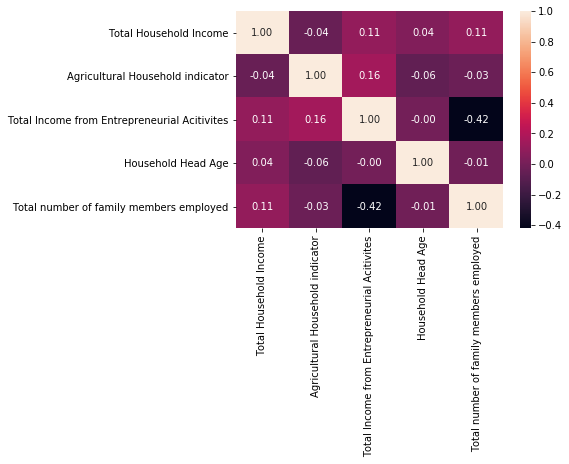

In [40]:
# Looking for co-relations
plt.rcParams.update({'font.size': 10})
sb.heatmap(income_data_middle.corr(), annot=True, fmt='.2f')

### Modelling attempt

In [51]:
model_features = pd.get_dummies(income_data_middle, drop_first=False);

In [52]:
model_features.shape

(15490, 348)

In [53]:
# Drop target column
model_features_categories = model_features.drop(['Total Household Income'], axis=1)

In [54]:
model_features_categories.head()

,Agricultural Household indicator,Total Income from Entrepreneurial Acitivites,Household Head Age,Total number of family members employed,Region_ ARMM,Region_CAR,Region_Caraga,Region_I - Ilocos Region,Region_II - Cagayan Valley,Region_III - Central Luzon,...,Household Head Class of Worker_Worked with pay in own family-operated farm or business,Household Head Class of Worker_Worked without pay in own family-operated farm or business,Tenure Status_Not Applicable,"Tenure Status_Own house, rent lot","Tenure Status_Own house, rent-free lot with consent of owner","Tenure Status_Own house, rent-free lot without consent of owner",Tenure Status_Own or owner-like possession of house and lot,Tenure Status_Rent house/room including lot,Tenure Status_Rent-free house and lot with consent of owner,Tenure Status_Rent-free house and lot without consent of owner
1,0,0,40,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,15580,52,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,75687,65,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,46,3,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,72290,45,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
model_features_categories.isnull().sum().sum()

0

In [57]:
model_features_categories.shape

(15490, 347)

In [58]:
# Set X & y data for models
X = model_features_categories
y = model_features['Total Household Income']

In [59]:
X.shape[0]

15490

In [60]:
y.shape[0]

15490

In [63]:
# Create Training and Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

### Linear Regression

In [64]:
# Linear Regression
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train) 
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.25918103456467656.  The rsquared on the test data was -1.2812517468844998e+27.


In [65]:
def coef_weights(coefficients, X_train):
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
280,"Household Head Occupation_Sculptors, painters ...",2.735500e+19,2.735500e+19
285,Household Head Occupation_Sewing machine opera...,2.142829e+19,2.142829e+19
268,"Household Head Occupation_Radio, television an...",-2.088898e+19,2.088898e+19
96,Household Head Occupation_Builders (traditiona...,-1.934135e+19,1.934135e+19
231,Household Head Occupation_Other computer profe...,-1.830591e+19,1.830591e+19
41,Household Head Highest Grade Completed_Environ...,-1.751640e+19,1.751640e+19
256,Household Head Occupation_Photographic product...,-1.599597e+19,1.599597e+19
245,"Household Head Occupation_Other supervisors, n...",1.436725e+19,1.436725e+19
264,Household Head Occupation_Production and opera...,1.382163e+19,1.382163e+19
30,Household Head Marital Status_Unknown,1.107942e+19,1.107942e+19


### Random Forest

In [66]:
# RandomForestRegressor
ForestRegressor = RandomForestRegressor(n_estimators=50)
ForestRegressor.fit(X_train, y_train)
y_test_preds = ForestRegressor.predict(X_test)
y_train_preds = ForestRegressor.predict(X_train)

print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))
print(median_absolute_error(y_test, y_test_preds))

0.21029440803134225
611414081.1415489
16833.059999999998


In [67]:
test_score_random_forest = r2_score(y_test, y_test_preds)
train_score_random_forest = r2_score(y_train, y_train_preds)

In [68]:
print("For Random Forest Regressor, the rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score_random_forest, test_score_random_forest))

For Random Forest Regressor, the rsquared on the training data was 0.8878637023261066.  The rsquared on the test data was 0.21029440803134225.


In [69]:
coeff_dataframe = pd.DataFrame()

coeff_dataframe['est_int'] = X_train.columns
coeff_dataframe['coeff'] = ForestRegressor.feature_importances_
coeff_dataframe.sort_values('coeff', ascending=False).head(20)

,est_int,coeff
1,Total Income from Entrepreneurial Acitivites,0.220621
2,Household Head Age,0.126888
3,Total number of family members employed,0.052403
21,Main Source of Income_Enterpreneurial Activities,0.029088
4,Region_ ARMM,0.027238
0,Agricultural Household indicator,0.023928
13,Region_NCR,0.015288
53,Household Head Highest Grade Completed_High Sc...,0.014185
38,Household Head Highest Grade Completed_Element...,0.013440
343,Tenure Status_Own or owner-like possession of ...,0.011406


In [70]:
coeff_dataframe.index = coeff_dataframe.est_int

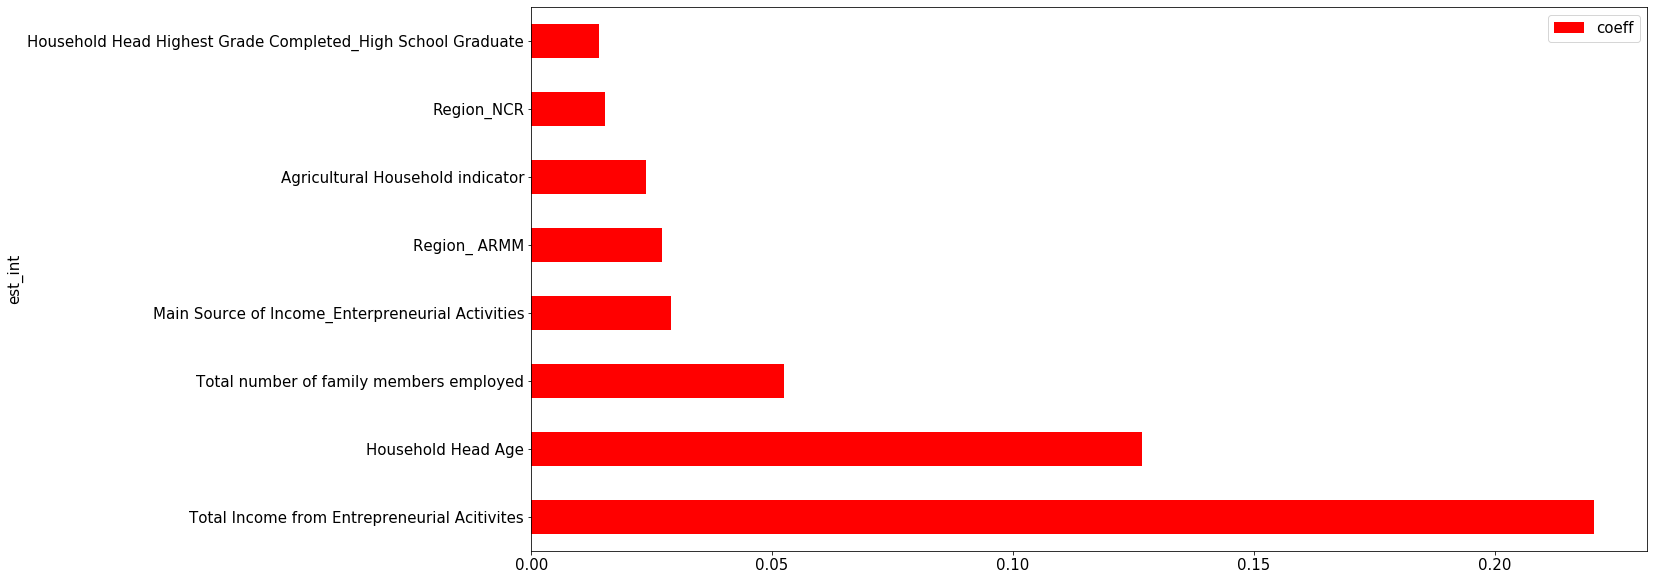

In [71]:
plt.rcParams.update({'font.size': 15})
coeff_dataframe.sort_values('coeff', ascending=False).head(8).plot(kind = 'barh',figsize = (20,10), facecolor='red');